In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [2]:
def get_dataset():
    training_set = pd.read_csv('training.csv', sep=';')
    validation_set = pd.read_csv('validation.csv', sep=';')
    return training_set, validation_set

In [3]:
training_set, validation_set = get_dataset()
training_set = shuffle(training_set, random_state=0)

In [5]:
training_set.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
526,b,"22,08","8,3e-05",u,g,c,h,"2,165",f,f,0,t,g,128.0,0,1280000.0,NaN,1,yes.
2342,a,"18,83","0,000954",u,g,aa,v,"0,085",t,f,0,f,g,100.0,0,1000000.0,NaN,1,yes.
1065,b,"31,33","0,00195",u,g,c,v,7,t,t,16,f,g,0.0,5000,0.0,t,1,yes.
1666,a,"25,17","0,0002875",u,g,x,h,"0,875",t,f,0,f,g,360.0,0,3600000.0,NaN,1,yes.
3065,b,"37,42","0,000204",u,g,W,v,"0,04",t,f,0,t,g,400.0,5800,4000000.0,NaN,1,yes.


In [6]:
validation_set.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,b,"32,33","0,00075",u,g,e,bb,"1,585",t,f,0,t,s,420.0,0,4200000.0,NaN,1,no.
1,b,"23,58","0,000179",u,g,c,v,"0,54",f,f,0,t,g,136.0,1,1360000.0,NaN,0,no.
2,b,"36,42","7,5e-05",y,p,d,v,"0,585",f,f,0,f,g,240.0,3,2400000.0,NaN,1,no.
3,b,"18,42","0,0010415",y,p,aa,v,"0,125",t,f,0,f,g,120.0,375,1200000.0,NaN,0,no.
4,b,"24,5","0,0013335",y,p,aa,v,"0,04",f,f,0,t,g,120.0,475,1200000.0,f,1,no.


In [7]:
def txt_to_category(input_set):
    #turn the No to 0 and yes to 1 to help with the classification
    input_set['classLabel'] = input_set['classLabel'].map({'yes.':1, 'no.': 0})
    #calls a function that turns the char category into a numerical category
    input_set = category_helper_func(input_set)
    return input_set
    
def category_helper_func(input_set):
    #this function turns unique chars into unique categories
    encoder = LabelEncoder()
    var9_cat = input_set['variable9']
    var10_cat = input_set['variable10']
    var12_cat = input_set['variable12']
    var13_cat = input_set['variable13']
    input_set['variable9'] = encoder.fit_transform(var9_cat)
    input_set['variable10'] = encoder.fit_transform(var10_cat)
    input_set['variable12'] = encoder.fit_transform(var12_cat)
    input_set['variable13'] = encoder.fit_transform(var13_cat)
    return input_set

def clean_bad_data(input_set):
    input_set.drop('variable3', axis=1, inplace=True)
    input_set.drop('variable8', axis=1, inplace=True)
    # remove the columns with missing elements
    counter_nan = input_set.isnull().sum()
    counter_without_nan = counter_nan[counter_nan==0]
    input_set = input_set[counter_without_nan.keys()]
    return input_set

def normalization(input_set):
    input_set['variable15']=(input_set['variable15']-input_set['variable15'].mean())/input_set['variable15'].std()
    input_set['variable11']=(input_set['variable11']-input_set['variable11'].mean())/input_set['variable11'].std()
    return input_set

In [8]:
def prepare_data(input_set):
    #cleansing bad NaN data
    input_set = clean_bad_data(input_set)
    #Normalizing numerical values
    input_set = normalization(input_set)
    #turning the text data into numerical data categories to ease our process a bit
    input_set = txt_to_category(input_set)
    return input_set

In [9]:
pd.set_option('mode.chained_assignment', None)
#gets the prepated data that is ready to be visualized and modeled
training_set = prepare_data(training_set)
validation_set = prepare_data(validation_set)

In [13]:
training_set.head(3)

,variable9,variable10,variable11,variable12,variable13,variable15,variable19,classLabel
526,0,0,-0.616246,1,0,-0.257988,1,1
2342,1,0,-0.616246,0,0,-0.257988,1,1
1065,1,1,1.753931,0,0,0.316159,1,1


In [14]:
validation_set.head(3)

,variable9,variable10,variable11,variable12,variable13,variable15,variable19,classLabel
0,1,0,-0.660209,1,2,-0.411322,1,0
1,0,0,-0.660209,1,0,-0.410699,0,0
2,0,0,-0.660209,0,0,-0.409452,1,0


In [15]:
#due to have a few feature we're able to check the correlation between pairs
#it helps alot in getting insights about features
corr = training_set.corr()
corr['classLabel'].sort_values(ascending=False)

classLabel    1.000000
variable19    1.000000
variable9     0.545244
variable10    0.218894
variable11    0.153039
variable15    0.066893
variable12    0.042168
variable13   -0.055473
Name: classLabel, dtype: float64

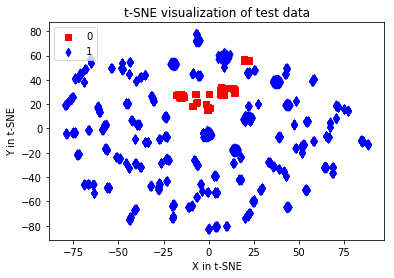

In [16]:
# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(training_set)

# scatter plot the sample points among 2 classes
markers=('s', 'd')
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(training_set['classLabel'])):
    plt.scatter(x=x_test_2d[training_set['classLabel']==cl,0], y=x_test_2d[training_set['classLabel']==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

In [17]:
#splitting the features from the label
X, Y = training_set.iloc[:,:-2], training_set.iloc[:,-1]
X_valid, Y_valid = validation_set.iloc[:,:-2], validation_set.iloc[:,-1]

In [18]:
#to ignore some catched errors
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#specifying the model and training it
lr = LogisticRegression(C=5)
lr.fit(X, Y)
print('LogisticRegression Training Score: ', lr.score(X, Y))
print('LogisticRegression Cross Validation: ', lr.score(X_valid, Y_valid))

LogisticRegression Training Score:  0.9245945945945946
LogisticRegression Cross Validation:  0.72
